## Introduction

I love Tic-Tac-Toe. Besides brining back fond childhood memories, it offers a simple playground for a noob like me to learn more about Computer Science, Algorithms and AI. In this blog post , I will use the Mini-Max algorithm to solve the game of Tic Tac Toe.

To solve the game means, we will be able to discover a strategy that ties the game against an optimal opponent and wins against any non-optimal opponent.

## The Game

If you are from Mars, and do not know how the game works, here are the rules courtesy of Wikipedia

> "Tic-tac-toe (American English), noughts and crosses (Commonwealth English and British English), or Xs and Os/“X’y O’sies” (Ireland), is a paper-and-pencil game for two players, X and O, who take turns marking the spaces in a 3×3 grid. The player who succeeds in placing three of their marks in a diagonal, horizontal, or vertical row is the winner. "


## The  Minimax Algorithm

There are already plenty of great resources to learn about the minimax algorithm like this [one](https://towardsdatascience.com/understanding-the-minimax-algorithm-726582e4f2c6) which I will liberally borrow from. I only briefly explain the algorithm here.

The Mini-Max algorithm is perfect for 2-player (X vs Y) games like Tic-Tac-Toe where player X is trying to maximize his chances of winning while player Y is trying to minimize X's chances of winning.

Consider a small imaginary game where each player can make one of two moves (Left or Right). Player X moves first followed by player Y at which point the score of the game is known. 

![](minimax_mine.png)

The score of the game ranges from 1-4. Player X wants to maximize this score while player Y tries to minimize it.To determine what is the optimal action player X should take , we should work backward from the end of the game.

A,B,C,D,E,F and G are various states of the game where the latter 4 are terminal states.

### Move 2

When making Move 2, Player Y can be in states B or C.

In State B, Player Y can choose **L** to yield a score of 4 or **R** to yield score of E. Given, he wants to minimze the overall score , he will choose **R**.

Similarly in State C, Player Y will choose **R** to minimze overall score. 

The value of States B and C are now 3 and 1 respectively.

### Move 1

For the first move, Player X is in state A. He can choose **L** which lands him in state B with a score of 3 or  choose **R** which lands him in state C with a score of 1.

Given he wants to maximize the score, he chooses **L**.

### Algorithm

This suggests an algorithm to choose the optimal move from any given state for a maximizing player.

At any given state, enumerate the possible child states. Now determine the value of these child states by invoking the minimizing player i.e. Ask the miniming player what he would do in each of these states and return the value he gets. Choose the action that leads to the highest value state.

Similarly for for a minimizing player, enumerate the child states and determine the value of each state by invoking the maximizing player. Choose the action that leads to the lowest value state.

If at any stage, the child state is a terminal state, the value of the terminal state is simply returned.

Let us use code to solve the simple toy problem above.

In [121]:
import numpy as np

In [2]:
children = {'a':['b','c'],'b':['d','e'],'c':['f','g']} #mapping from state to child states
value = {'d':4,'e':3,'f':2,'g':1} # value of terminal states
action = {'d':'L','e':'R','f':'L','g':'R','b':'L','c':'R'} # mapping from state to the action that produces that state

We will also keep a cache of the optimal next state for both maximizing and minimizing players, to make the computation a little faster. This hardly matters for this toy problem but can help for larger problems.

In [3]:
max_optimal_next_states = {}
min_optimal_next_states = {}

In [4]:
def produce_children(state):
    "Function to produce children of a state"
    return children.get(state,None)

def is_terminal(state):
    "Function to check if a state is terminal and return value of the state"
    if state in children:
        return False,0
    return True,value[state]

def get_action(next_state,current_state=None): 
    "Function to determine action that moves from current state to next state"
    #current state is redundant for this example as there is only one way to get to a state
    "Function to return action that moves player from current state to next state"
    return action[next_state]

In [9]:
import random
def maximize(state):
    
    if state in max_optimal_next_states:
        return max_optimal_next_states[state]
    
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state
    
    max_state, max_score = None,-np.Inf
    max_states = []
    children = produce_children(state)
    for child in children:
        _,score = minimize(child)
        if score > max_score:
            max_state,max_score = child,score
            max_states = [max_state]
        elif score == max_score: 
            max_states.append(child)
            
    # If multiple actions are optimal, break ties randomly
    max_state = random.choice(max_states)
    max_optimal_next_states[state] = (max_state,max_score)
    
    return max_state,max_score

In [6]:
def minimize(state):
    
    if state in min_optimal_next_states:
        return min_optimal_next_states[state]
    
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state
    
    min_state, min_score = None,np.Inf
    min_states = []
    children = produce_children(state)
    for child in children:
        _,score = maximize(child)
        if score < min_score:
            min_state,min_score = child,score
            min_states = [min_state]
        elif score == min_score: 
            min_states.append(child)
    
    min_state = random.choice(min_states)
    min_optimal_next_states[state] =  (min_state,min_score)
    
    return min_state,min_score

In [7]:
def optimal_decision(state,player = 'Maximizer'):
    if player == 'Maximizer':
        max_state,_ = maximize(state)
        return get_action(max_state,state)
    else:
        min_state,_ = minimize(state)
        return get_action(min_state,state)

Let us confirm this returns the expected decisions in the image above.

In [10]:
optimal_decision('a',player = 'Maximizer')

'L'

In [11]:
optimal_decision('b',player = 'Minimizer')

'R'

In [12]:
optimal_decision('c',player = 'Minimizer')

'R'

Now what if the roles were reverse with Player X being a minimizer and Player Y being a maximizer. We expect the decisions to flip.

In [13]:
optimal_decision('a',player = 'Minimizer')

'R'

In [14]:
optimal_decision('b',player = 'Maximizer')

'L'

In [15]:
optimal_decision('c',player = 'Maximizer')

'L'

## Minimax in Limited Tic Tac Toe

The toy problem above can be easily mapped to a limited tic-tac-toe game as shown in the image below.

![](minimax_ttt.png)

Here, of the three possible moves available to player X in the starting state, the move to place 'X' in the centre square is the only action that leads to a winning outcome. This can be figured out by recursively applying the minimax algorithm as illustrated above.

Note that Player X makes Move 1, Player Y makes Move 2 and Player X makes Move 3. This mini-game can end as early as after Move 1.

## Solving TicTacToe with Minimax

Let us denote player 'X' who plays first using 1 and player 'O' who plays second using 2. An empty square will be represented with 0.

In [16]:
s_to_b = {0:'__',1:'X',2:'O'} 

We will denote the state of a game using a tuple of length 9.For example:

In [17]:
state = (1,0,0,2,0,0,0,0,0)

In [18]:
def state_to_board(state):
    "Function to convert a a state(tuple) to a board(numpy array)""
    board = np.array([s_to_b[position] for position in state])
    return board.reshape(3,3)
    

The state can be converted to a board using the above function.

In [19]:
state_to_board((1,0,0,2,0,0,0,0,0))

array([['X', '__', '__'],
       ['O', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

A player wins if he or she gets a sequence of 'X's or 'O's.

In [20]:
max_player_wins = (1,1,1)
min_player_wins = (2,2,2)

Now all we have to do is redefine the functions `is_terminal` , `produce_children` and `get_action` for the new tic-tac-toe problem

A terminal state is reached if one of the players wins or if the board is fully occupied in which case the game is tied.<br>
We will set the score of the game as follows: <br>
X wins: + 10 <br>
O wins: -10 <br>
Draw: 0

In [21]:
def is_terminal(state):
    
    if  state[slice(0,3)] == max_player_wins:
        return True,10
    elif state[slice(0,3)] == min_player_wins:
        return True,-10
    elif state[slice(3,6)] == max_player_wins:
        return True,10
    elif state[slice(3,6)] == min_player_wins:
        return True,-10
    elif state[slice(6,9)] == max_player_wins:
        return True,10
    elif state[slice(6,9)] == min_player_wins:
        return True,-10
    elif state[slice(0,7,3)] == max_player_wins:
        return True,10
    elif state[slice(0,7,3)] == min_player_wins:
        return True,-10
    elif state[slice(1,8,3)] == max_player_wins:
        return True,10
    elif state[slice(1,8,3)] == min_player_wins:
        return True,-10
    elif state[slice(2,9,3)] == max_player_wins:
        return True,10
    elif state[slice(2,9,3)] == min_player_wins:
        return True,-10
    elif state[slice(0,9,4)] == max_player_wins:
        return True,10
    elif state[slice(0,9,4)] == min_player_wins:
        return True,-10
    elif state[slice(2,7,2)] == max_player_wins:
        return True,10
    elif state[slice(2,7,2)] == min_player_wins:
        return True,-10
    elif state.count(0) == 0:
        return True,0
    else:
        return False,0
        

We now define a function to produce the next set of possible states given a state.

In [22]:
from copy import deepcopy
def produce_children(state):
    l = list(state)
    children = []
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    if state.count(0) % 2 == 1: #If number of vacant spaces is odd , then it is max_player's turn
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 1
            children.append(tuple(child))
    else: #if number of vacant spaces is even then it is min_player's turn.
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 2
            children.append(tuple(child))
    
    return children

In [23]:
children = produce_children(state)
children

[(1, 1, 0, 2, 0, 0, 0, 0, 0),
 (1, 0, 1, 2, 0, 0, 0, 0, 0),
 (1, 0, 0, 2, 1, 0, 0, 0, 0),
 (1, 0, 0, 2, 0, 1, 0, 0, 0),
 (1, 0, 0, 2, 0, 0, 1, 0, 0),
 (1, 0, 0, 2, 0, 0, 0, 1, 0),
 (1, 0, 0, 2, 0, 0, 0, 0, 1)]

These correspond to the following states.

In [24]:
for child in children:
    print(state_to_board(child),'\n')

[['X' 'X' '__']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' 'X']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' 'X' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' 'X']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['X' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' 'X' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' '__' 'X']] 



Finally we define a function to return the action  that leads from the current state to the next state.

In [25]:
def difference(tuple1,tuple2):
    "Helper function to get the index where first difference between two tuples is observed"
    assert len(tuple1) == len(tuple2)
    for i,value in enumerate(tuple1):
        if value != tuple2[i]:
            return i
    return None
    
def get_action(next_state,current_state):
    return difference(next_state,current_state),next_state
    

We can now evaluate whether we can solve the mini tic-tac-toe problem above with the tools at hand.The starting state of the game is given by

In [26]:
state = (1,2,1,0,0,2,0,2,1)
state_to_board(state)

array([['X', 'O', 'X'],
       ['__', '__', 'O'],
       ['__', 'O', 'X']], dtype='<U2')

In [27]:
optimal_action,optimal_next_state = optimal_decision(state,player = 'Maximizer')
optimal_action,state_to_board(optimal_next_state)

(4,
 array([['X', 'O', 'X'],
        ['__', 'X', 'O'],
        ['__', 'O', 'X']], dtype='<U2'))

As expected , the algorithm determines the optimal action for player 'X' is to occupy the central square in the board.

Let us consider one more path in the game where player X plays a non-optimal move resulting in the following state.

In [28]:
state = (1,2,1,1,0,2,0,2,1)
state_to_board(state)

array([['X', 'O', 'X'],
       ['X', '__', 'O'],
       ['__', 'O', 'X']], dtype='<U2')

The optimal state of the minimizing player is given by

In [29]:
optimal_action,optimal_next_state = optimal_decision(state,player = 'Minimizer')
optimal_action,state_to_board(optimal_next_state)

(4,
 array([['X', 'O', 'X'],
        ['X', 'O', 'O'],
        ['__', 'O', 'X']], dtype='<U2'))

The minimizing player also picks the optimal action as expected.

## Putting it all together

Now we will analyze the following games

1) Random **X** vs Random **O** <br>
2) Optimal **X** vs Random **O** <br> 
3) Random **X** vs Optimal **O** <br>
4) Optimal **X** vs Optimal **O**

The following function represents a random player who chooses an available slot at random. The maximizer is player **X** while the minimizer is player **O**

In [53]:
import random
def random_decision(state,player = 'Maximizer'):
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    action = random.choice(vacant_slots)
    state_as_list = list(state)
    #Update state
    if player == 'Maximizer':
        state_as_list[action] = 1
    else:
        state_as_list[action] = 2
        
    return action,tuple(state_as_list)
    

Now we wil define a function to play N games and record the results for analysis

In [31]:
from collections import defaultdict
from tqdm import tqdm

In [94]:
def play_games(n_games:int,X_strategy,O_strategy):
    '''
    n_games: Number of games to be player
    X_strategy: function describing decision making strategy for player X
    O_strategy: function describing decision making strategy for player Y
    '''
    win_stats = defaultdict(int)
    #Dictionary for holding no of wins for games started with a particual move
    move_wins_X = defaultdict(int)
    move_wins_O = defaultdict(int)
    #Dictionary for holding no of games started with a particual move
    move_X = defaultdict(lambda:-1)
    move_O = defaultdict(lambda:-1)
    
    for i in tqdm(range(n_games)):
        random.seed(i)
        state = (0,0,0,0,0,0,0,0,0)
        terminal_status = False
       
        first_move_flag_X = True # Flag identifying first move of player X
        first_move_flag_O = True # Flag identifying first move of player O
        
        
        while not terminal_status:
            #Player X plays;  
            player_x_action,next_state = X_strategy(state,player='Maximizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_X:
                first_move_X = player_x_action
                move_X[first_move_X] += 1
                first_move_flag_X = False
            
            #If player X plays last move
            if terminal_status:
                if score == 10: #player X wins
                    win_stats['X_win'] +=1
                    move_wins_X[first_move_X] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state
            #Player O plays next
            
            player_o_action,next_state = O_strategy(state,player='Minimizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_O:
                first_move_O = player_o_action
                move_O[first_move_O] += 1
                first_move_flag_O = False
            
            
            #If player O plays last move
            if terminal_status:
                if score == -10: #player O wins
                    win_stats['O_win'] +=1
                    move_wins_O[first_move_O] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state    
        
    return win_stats,move_wins_X,move_wins_O,move_X,move_O
    

We also create a helper function to visualize the results.

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

def plot_results(results):
    win_stats,move_wins_X,move_wins_O,move_X,move_O = results
    win_stats_df = pd.DataFrame({'Category':list(win_stats.keys()),'Count':list(win_stats.values())})
    move_X_win_rate = {i:move_wins_X[i]/move_X[i]  for i in range(9)}
    move_O_win_rate = {i:move_wins_O[i]/move_O[i]  for i in range(9)}
    
    
    move_X_win_rate_array = np.array([move_X_win_rate[x] for x in range(9)]).reshape(3,3)
    move_O_win_rate_array = np.array([move_O_win_rate[x] for x in range(9)]).reshape(3,3)

        
    sns.set(font_scale=2)
    fig, axs = plt.subplots(ncols=3,figsize=(30,10))
    splot = sns.barplot(x="Category",y="Count",data=win_stats_df,ax=axs[0])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    splot.set_title('Distribution of Wins,Losses and Ties')
    
    sns.heatmap(move_X_win_rate_array,annot=True,ax = axs[1]).set_title('Player X:% of wins for first move')
    sns.heatmap(move_O_win_rate_array,annot=True,ax = axs[2]).set_title('Player Y:% of wins for first move')
    

## Random X vs Random O

In [113]:
results1 = play_games(1000,X_strategy=random_decision,O_strategy=random_decision)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18918.66it/s]


When both players follow a random strategy, player X has a first mover advantage and wins the majority of the games.

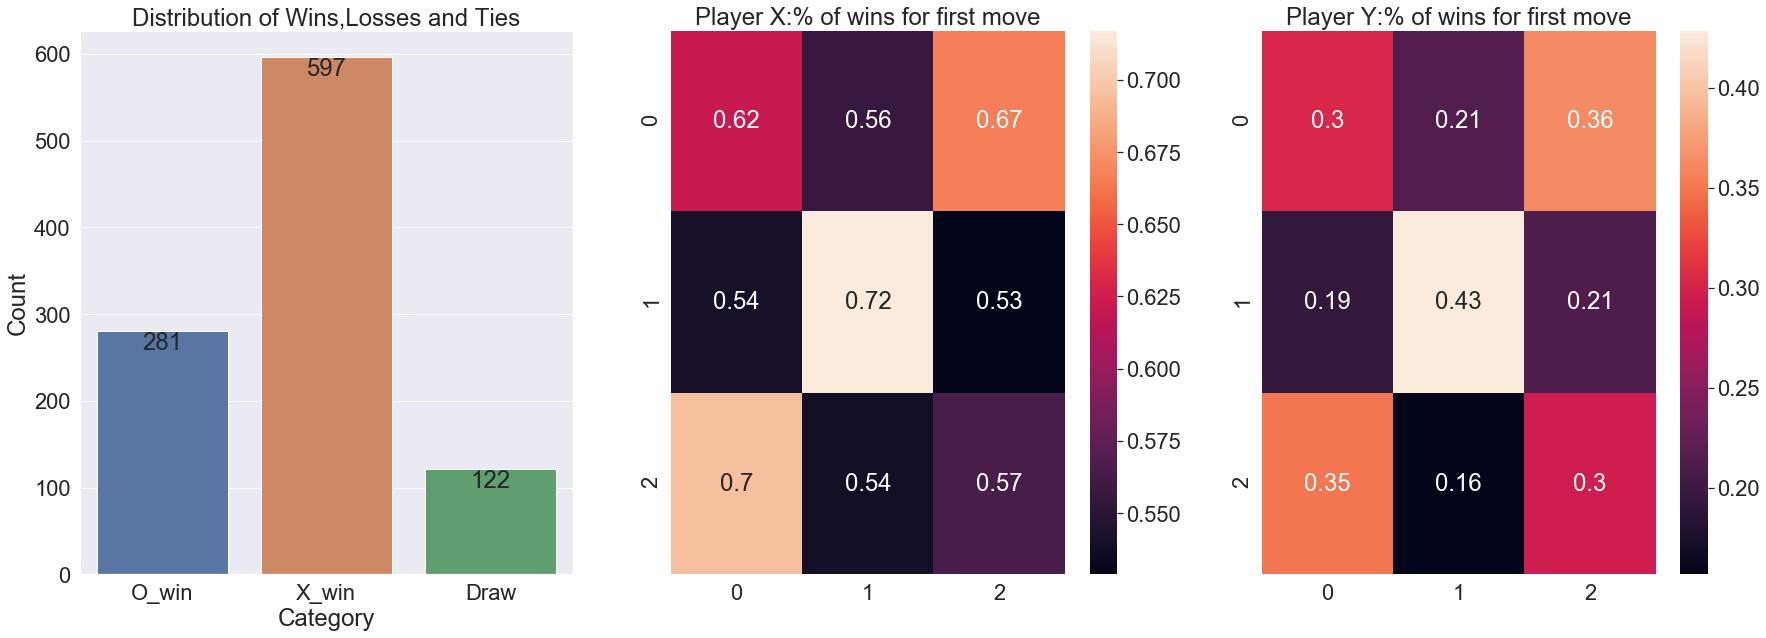

In [114]:
plot_results(results1)

We also see that given both players use random strategies: player X can play the first move in any of the squares without it affecting the win rate significantly.

For player O on the other hand, playing the first move in the central or corner square results in a significantly higher win rate.

## Optimal X vs Random O

In [115]:
results2 = play_games(1000,X_strategy=optimal_decision,O_strategy=random_decision)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 23855.53it/s]


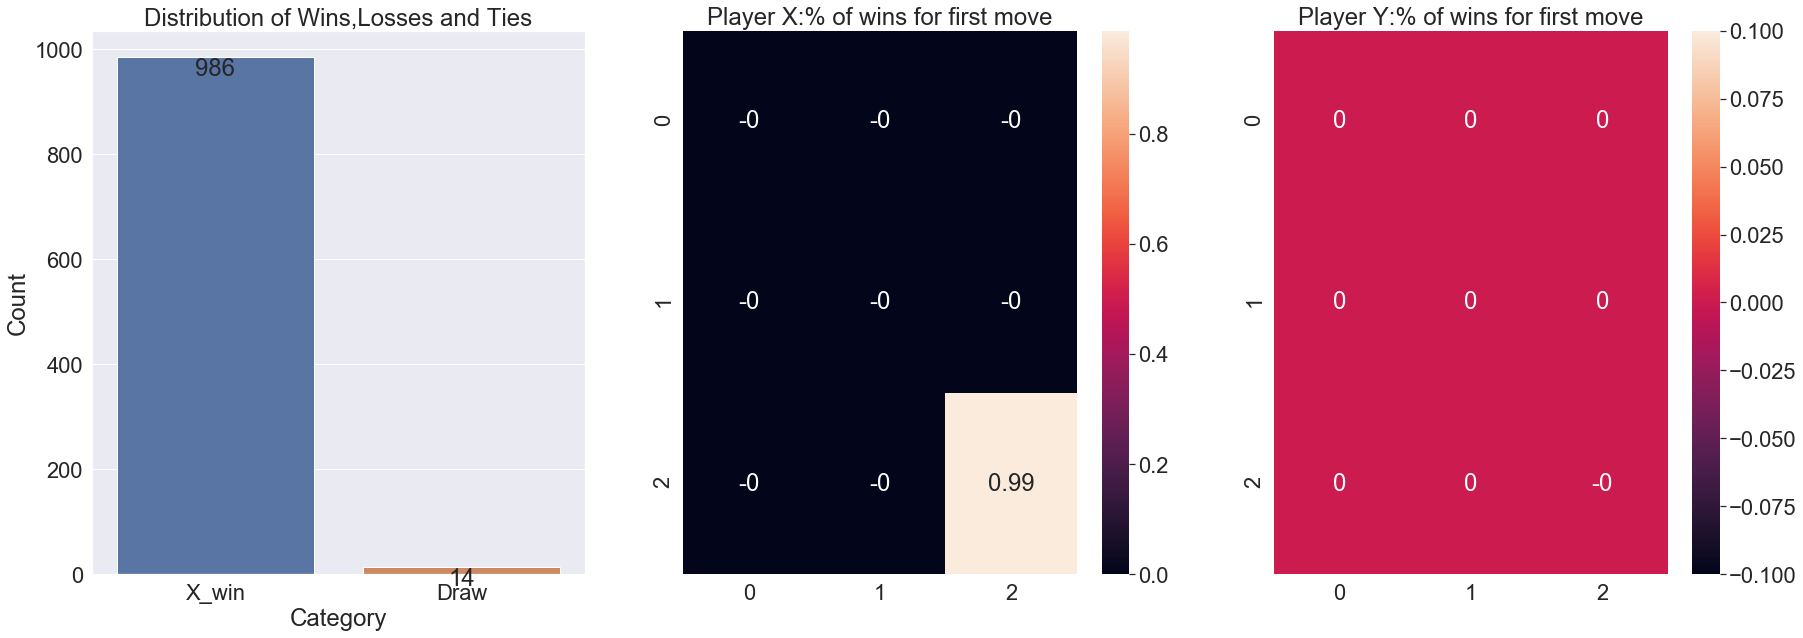

In [116]:
plot_results(results2)

When player X uses the optimal minimax strategy,it wins almost all the games.

It consistently picks the bottom right hand corner in the first move in every game.

## Random X vs Optimal O

In [117]:
results3 = play_games(1000,X_strategy=random_decision,O_strategy=optimal_decision)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 20872.38it/s]


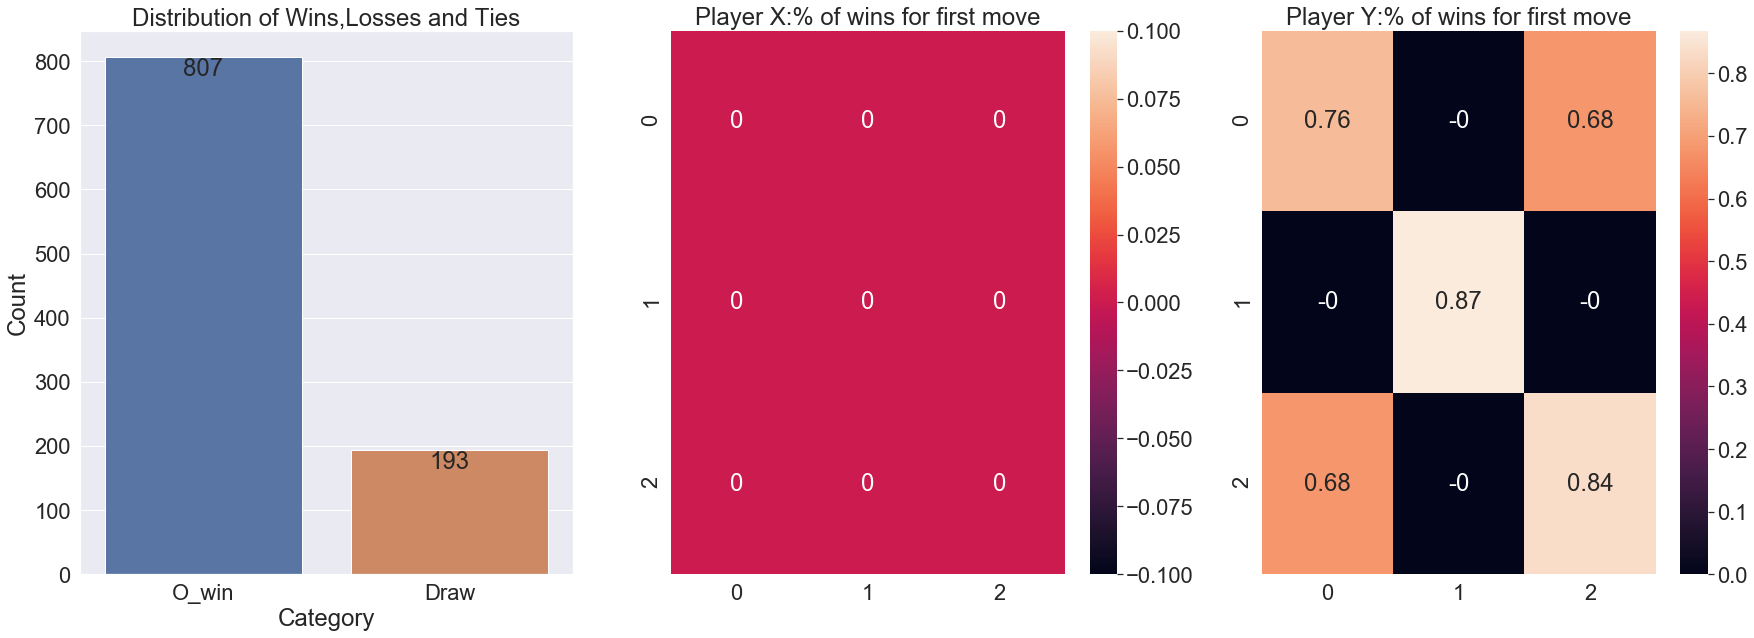

In [118]:
plot_results(results3)

In this case, O has a lower win rate given it does not have a fist movee advantage.

The win rate is highest when Player O gets to occupy the central square in the first move.

## Optimal X vs Optimal O

In [119]:
results4 = play_games(100,X_strategy=optimal_decision,O_strategy=optimal_decision)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 19933.96it/s]


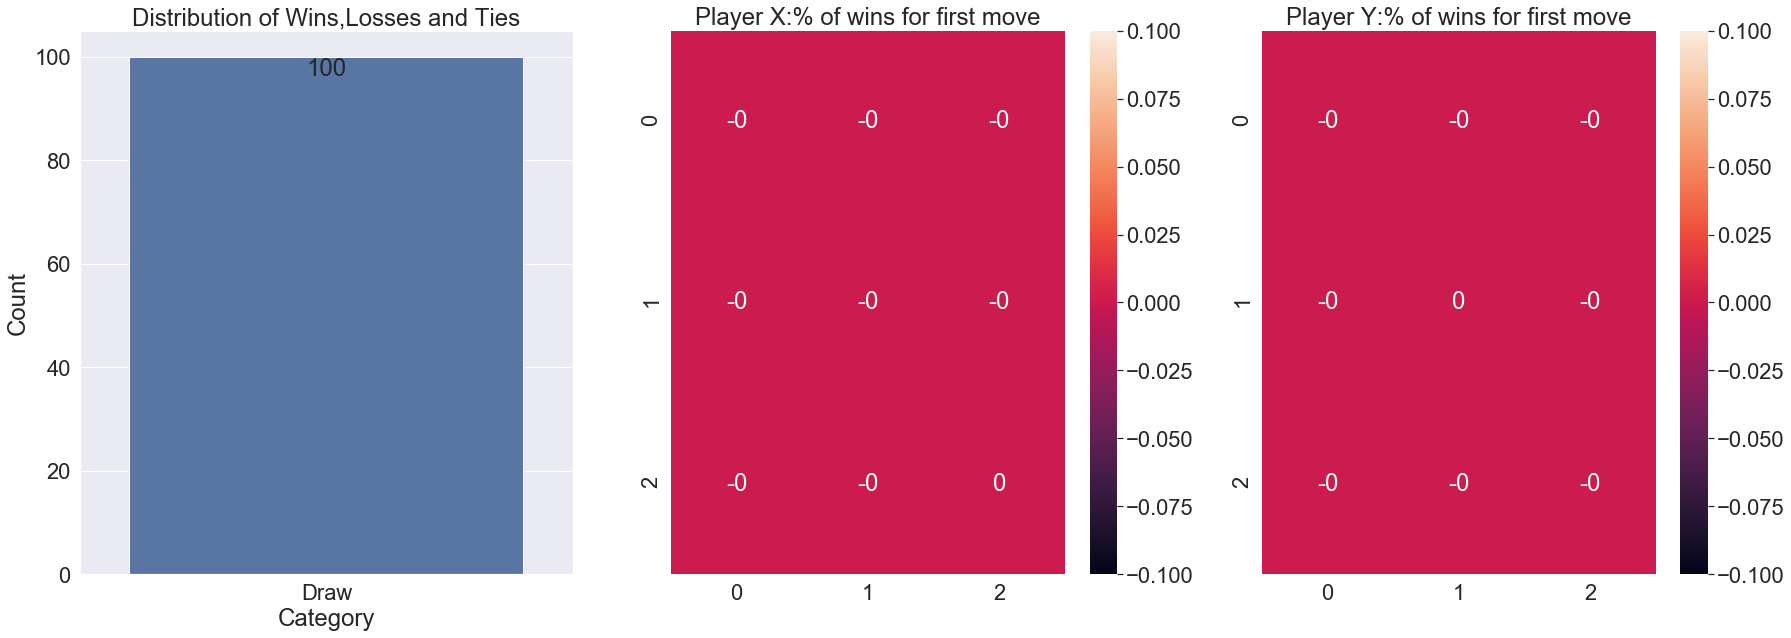

In [120]:
plot_results(results4)

When both players play the optimal strategy, all games end in ties.